In [83]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('AI Dataset/ClientCreditRating (Training Data).csv')
test_df = pd.read_csv('AI Dataset/ClientCreditRating (Testing Data).csv')

In [84]:
# Encoding variables
categorical_cols = ['Education','MarriageStatus','HasChildren','ExistingLoan','PurposeOfLoan']
label_cols = 'CreditWorthy'
train_df = pd.get_dummies(train_df, columns = categorical_cols)
test_df = pd.get_dummies(test_df, columns = categorical_cols)

# YES: 1
# NO: 0
train_df[label_cols] = np.where(train_df[label_cols].str.contains("Yes"), 1, 0)
test_df[label_cols] = np.where(test_df[label_cols].str.contains("Yes"), 1, 0)

# Data normalization
# df = df[['Age','MonthlyIncome']].apply(lambda x: MinMaxScaler().fit_transform(x))
def normalization(df):
    df=(df-df.min())/(df.max()-df.min())
    return df

train_df = normalization(train_df)
test_df = normalization(test_df)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import classification_report


X_train = train_df.drop(columns=label_cols)
y_train = train_df[label_cols]

X_test = test_df.drop(columns=label_cols)
y_test = test_df[label_cols]

clf = RandomForestClassifier(max_depth=7, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))




[[14  5]
 [ 2 19]]
Accuracy:  0.825
F1 score:  0.8444444444444444
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80        19
         1.0       0.79      0.90      0.84        21

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



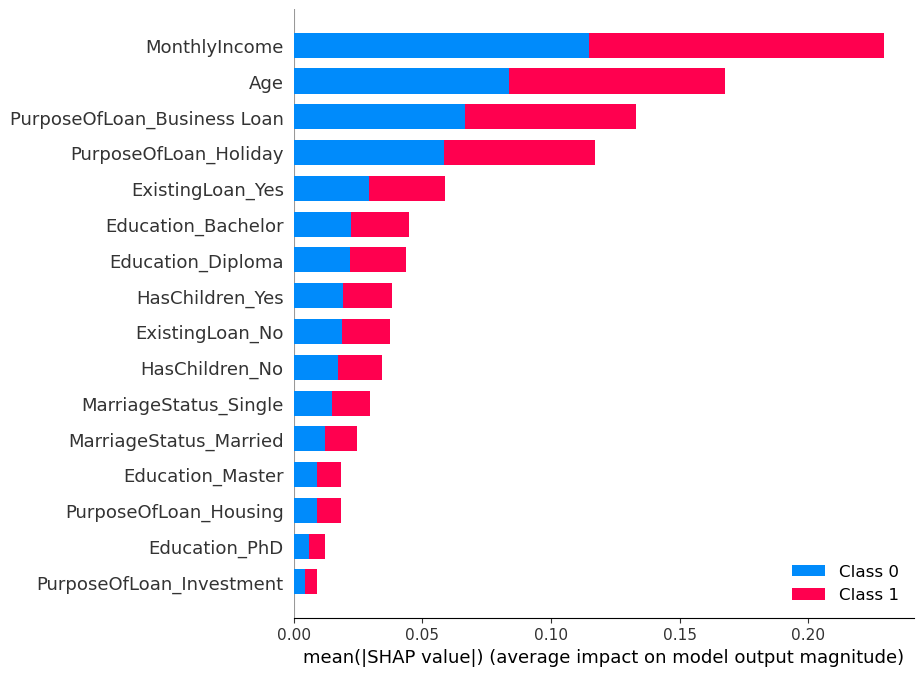

In [86]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
# shap.plots.beeswarm(explainer)

In [87]:
from sklearn.tree import export_graphviz

estimator = clf.estimators_[5]

export_graphviz(estimator,
                out_file='tree.dot',
                feature_names=X_test.columns,
                class_names=y_test.name,
                filled=True,
                rounded=True)

In [88]:

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
# Performance Improvement
# 1. Hyperparameter Opimization (Bayesian Optimization CV, Random Search, Grid Search, etc)
# 2. Cross validation

# Insufficient Training Data
# 1. Collect more real data, if possible. This is significantly important.
# 2. Boostrapping
# 3. Oversampling